# 一些关于Matplotlib的更深入介绍 

[参考原文章](https://liam.page/2014/09/11/matplotlib-tutorial-zh-cn/)  
[Matplot Wiki](https://matplotlib.org/)  

2023.9 
袁畅 

这篇介绍来自作者于2023秋季学期选修布树辉老师开的机器学习课上的随堂介绍，感谢老师给我这个机会将本文整理后上传。  
希望可以帮到后来的学习者。  

Matplotlib可能是Python 2D-绘图领域使用最广泛的包。它能让使用者很轻松的将数据图形化，并且提供多样化的输出格式，这里将会探索Matplotlib的常见用法  


复制本单元格命令到终端并运行以安装教程内所需的软件包 

/<code>
#matplotlib和jupyter安装  
python -m pip install matplotlib  
python pip install -i https://pypi.douban.com/simple/ jupyter
pip config set global.index-url https://mirrors.aliyun.com/pypi/simple/  
pip config set install.trusted-host mirrors.aliyun.com 
/</code>

### 初级绘制  
这一节中，首先导入我们需要的包，从简到繁：先尝试用默认配置在同一张图上绘制正弦和余弦函数的图像，然后逐步美化它。（代码基于Jupyter Notebook）  
第一步，导入包，取得正弦函数和余弦函数的值  


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
X = np.linspace(-np.pi,np.pi,256,endpoint=True)
C,S =np.cos(X),np.sin(X) 

#### 使用默认配置 
X 是一个 numpy 数组，包含了从 −π 到 +π 等间隔的 256 个值。C 和 S 则分别是这 256 个值对应的余弦和正弦函数值组成的 numpy 数组。  
下面一张图显示了部分Matplot支持的绘图形式 

<img src=plottype.png width=40% />

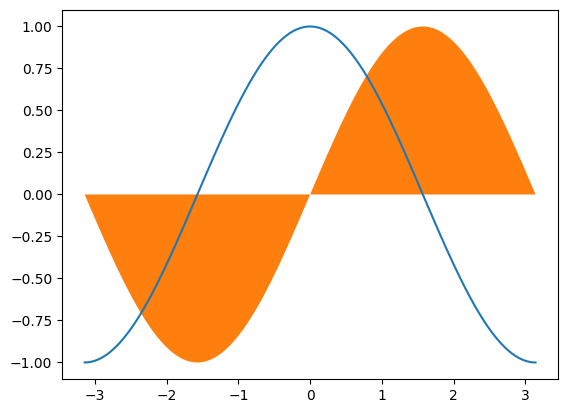

In [3]:
plt.plot(X,C)
plt.stackplot(X,S)
plt.show()

#### 默认配置的具体内容  
Matplotlib 的默认配置都允许用户自定义。你可以调整大多数的默认配置：图片大小和分辨率（dpi）、线宽、颜色、风格、坐标轴、坐标轴以及网格的属性、文字与字体属性等。不过，Matplotlib 的默认配置在大多数情况下已经做得足够好，你可能只在很少的情况下才会想更改这些默认配置。下面的代码中，我们展现了 Matplotlib 的默认配置并辅以注释说明，这部分配置包含了有关绘图样式的所有配置。

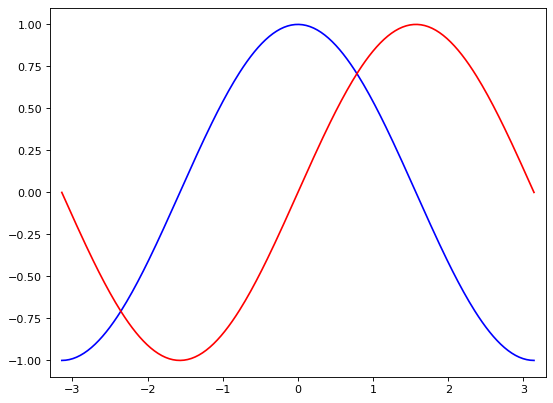

In [4]:
# 创建一个 8 * 6 点（point）的图，并设置分辨率为 80
plt.figure(figsize=(8,6), dpi=80)

# 创建一个新的 1 * 1 的子图，接下来的图样绘制在其中的第 1 块（也是唯一的一块）
plt.subplot(1,1,1)

#从 *−π* 到 *+π* 等间隔的 256 个值，且包含端点值。
X = np.linspace(-np.pi, np.pi, 256,endpoint=True)
C,S = np.cos(X), np.sin(X)

# 绘制余弦曲线，使用蓝色的、连续的、宽度为 1.5 （像素）的线条
plt.plot(X, C, color="blue", linewidth=1.5, linestyle="-")

# 绘制正弦曲线，使用红色的、连续的、宽度为 1.5 （像素）的线条
plt.plot(X, S, color="red", linewidth=1.5, linestyle="-")

# 设置横轴的上下限
plt.xlim(-3.3,3.3)

# 设置横轴记号
plt.xticks(np.linspace(-3,3,7,endpoint=True))

# 设置纵轴的上下限
plt.ylim(-1.1,1.1)

# 设置纵轴记号
plt.yticks(np.linspace(-1,1,9,endpoint=True))

# 将图片保存为png格式,分辨率 100 ,如果是空白图片，你可以查阅相关知识
plt.savefig('exercice_2.png',dpi=100)

# 在屏幕上显示
plt.show()

#### 改变线条的颜色和粗细 
首先，我们以蓝色和红色分别表示余弦和正弦函数，而后将线条变粗一点。接下来，我们在水平方向拉伸一下整个图。

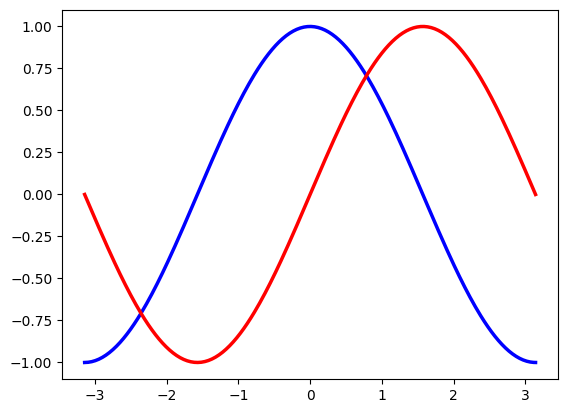

In [5]:
plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-")
plt.plot(X, S, color="red",  linewidth=2.5, linestyle="-")
plt.show()

#### 设置图片边界 
当前的图片边界设置得不好，所以有些地方看得不是很清楚。

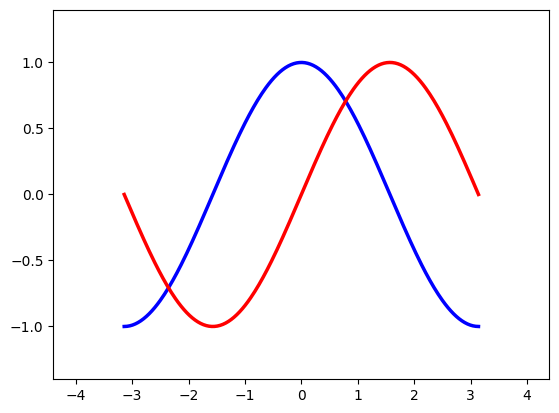

In [6]:
plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-")
plt.plot(X, S, color="red",  linewidth=2.5, linestyle="-")
#上述代码是为了显示图线
xmin ,xmax = X.min(), X.max()
ymin, ymax = C.min(), C.max()
dx = (xmax - xmin) * 0.2
dy = (ymax - ymin) * 0.2
plt.xlim((xmin - dx, xmax + dx))
plt.ylim((ymin - dy, ymax + dy))
plt.show()

#### 设置记号和标签 
我们讨论正弦和余弦函数的时候，通常希望知道函数在 ±π 和 ±π/2 的值。当我们设置记号的时候，我们可以同时设置记号的标签。注意这里使用了LaTeX。

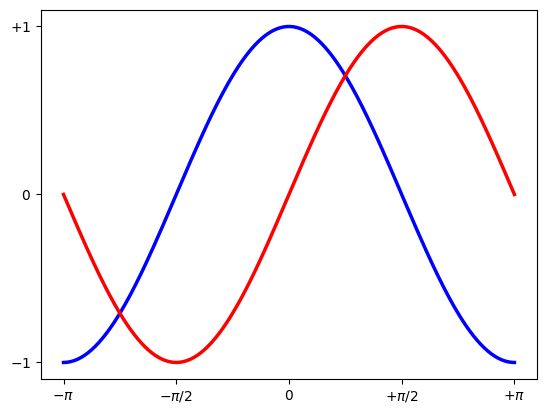

In [7]:
plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-")
plt.plot(X, S, color="red",  linewidth=2.5, linestyle="-")
#上述代码是为了显示图线
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
       [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])

plt.yticks([-1, 0, +1],
       [r'$-1$', r'$0$', r'$+1$'])
plt.show()

#### 移动脊柱 
坐标轴线和上面的记号连在一起就形成了脊柱，它记录了数据区域的范围。它们可以放在任意位置，不过至今为止，我们都把它放在图的四边。
实际上每幅图有四条脊柱（上下左右），为了将脊柱放在图的中间，我们必须将其中的两条（上和右）设置为无色，然后调整剩下的两条到合适的位置——数据空间的 0 点。

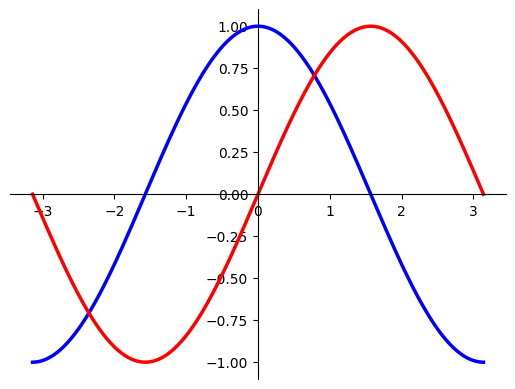

In [8]:
plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-")
plt.plot(X, S, color="red",  linewidth=2.5, linestyle="-")
#上述代码是为了显示图线
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))
plt.show()

#### 添加图例 
我们在图的左上角添加一个图例。为此，我们只需要在 plot 函数里以「键 - 值」的形式增加一个参数。

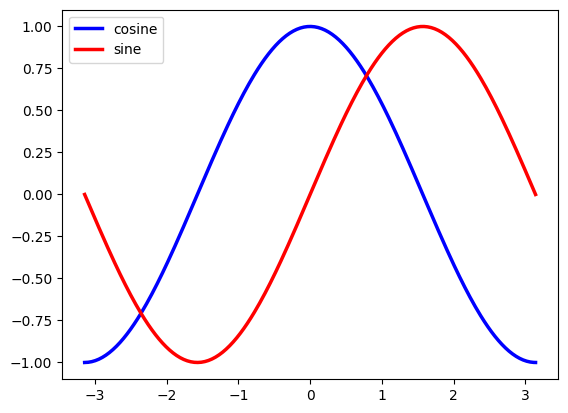

In [9]:
plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-", label="cosine")
plt.plot(X, S, color="red",  linewidth=2.5, linestyle="-", label="sine")
plt.legend(loc='best')
plt.show()

### 另一种画图的方法
使用ploy()或subplot()的返回值，这样利用句柄/指针操作绘图的方法可以使代码更高效和易懂

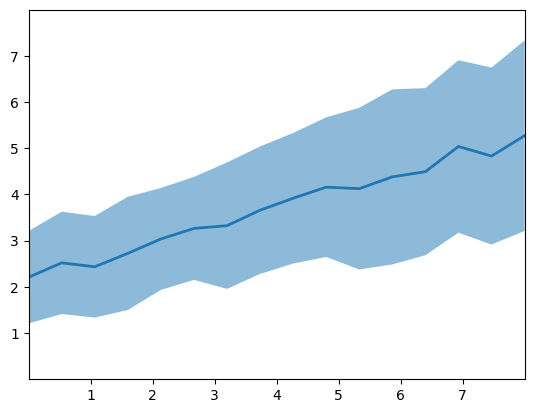

In [10]:
# make data
np.random.seed(1)
x = np.linspace(0, 8, 16)
y1 = 3 + 4*x/8 + np.random.uniform(0.0, 0.5, len(x))
y2 = 1 + 2*x/8 + np.random.uniform(0.0, 0.5, len(x))

# plot
fig, ax = plt.subplots() #返回一个图画的对象，第一个返回对象是图、第二个是轴

ax.fill_between(x, y1, y2, alpha=.5, linewidth=0) #涂满两个值之间的图
ax.plot(x, (y1 + y2)/2, linewidth=2) #画出中心线

ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()

### 图像、子图、坐标轴和记号

到目前为止，我们都用隐式的方法来绘制图像和坐标轴。快速绘图中，这是很方便的。我们也可以显式地控制图像、子图、坐标轴。Matplotlib 中的「图像」指的是用户界面看到的整个窗口内容。在图像里面有所谓「子图」。子图的位置是由坐标网格确定的，而「坐标轴」却不受此限制，可以放在图像的任意位置。我们已经隐式地使用过图像和子图：当我们调用 plot 函数的时候，matplotlib 调用 gca() 函数以及 gcf() 函数来获取当前的坐标轴和图像；如果无法获取图像，则会调用 figure() 函数来创建一个——严格地说，是用 subplot(1,1,1) 创建一个只有一个子图的图像。

### 图像

所谓「图像」就是 GUI 里以「Figure #」为标题的那些窗口。图像编号从 1 开始，与 MATLAB 的风格一致，而于 Python 从 0 开始编号的风格不同。以下参数是图像的属性：
![图像属性](shuxing.png)

这些默认值可以在源文件中指明。不过除了图像数量这个参数，其余的参数都很少修改。  
Matplotlib 也提供了名为 close 的函数来关闭这个窗口。close 函数的具体行为取决于你提供的参数：  

1.不传递参数：关闭当前窗口；  
2.传递窗口编号或窗口实例（instance）作为参数：关闭指定的窗口；  
3.all：关闭所有窗口。  

### 子图
你可以用子图来将图样（plot）放在均匀的坐标网格中。用 subplot 函数的时候，你需要指明网格的行列数量，以及你希望将图样放在哪一个网格区域中。  
此外，gridspec 的功能更强大，你也可以选择它来实现这个功能。

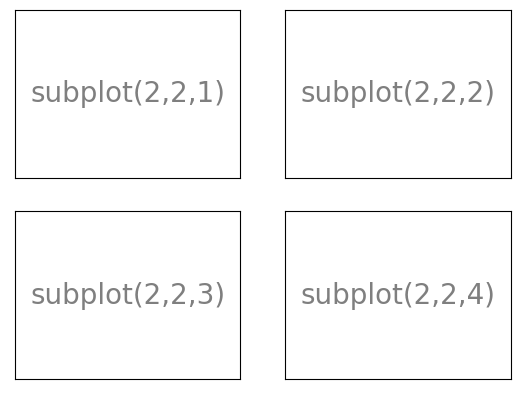

In [11]:
plt.subplot(2,2,1)
plt.xticks([]), plt.yticks([])
plt.text(0.5,0.5, 'subplot(2,2,1)',ha='center',va='center',size=20,alpha=.5)

plt.subplot(2,2,2)
plt.xticks([]), plt.yticks([])
plt.text(0.5,0.5, 'subplot(2,2,2)',ha='center',va='center',size=20,alpha=.5)

plt.subplot(2,2,3)
plt.xticks([]), plt.yticks([])
plt.text(0.5,0.5, 'subplot(2,2,3)',ha='center',va='center',size=20,alpha=.5)

plt.subplot(2,2,4)
plt.xticks([]), plt.yticks([])
plt.text(0.5,0.5, 'subplot(2,2,4)',ha='center',va='center',size=20,alpha=.5)
plt.show()

### 坐标轴
坐标轴和子图功能类似，不过它可以放在图像的任意位置。因此，如果你希望在一副图中绘制一个小图，就可以用这个功能。

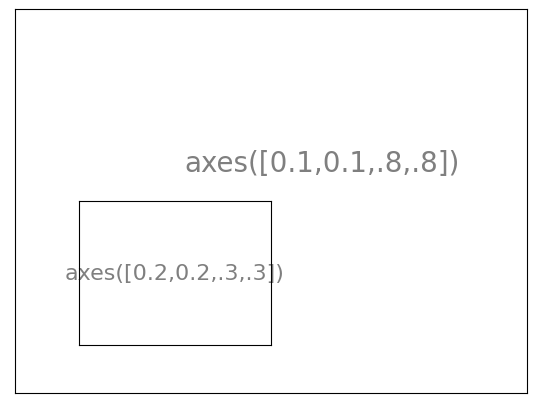

In [12]:
plt.axes([0.1,0.1,.8,.8])
plt.xticks([]), plt.yticks([])
plt.text(0.6,0.6, 'axes([0.1,0.1,.8,.8])',ha='center',va='center',size=20,alpha=.5) ##这里的0.1是原点位置，0.8为宽度

plt.axes([0.2,0.2,.3,.3])
plt.xticks([]), plt.yticks([])
plt.text(0.5,0.5, 'axes([0.2,0.2,.3,.3])',ha='center',va='center',size=16,alpha=.5)

plt.show()

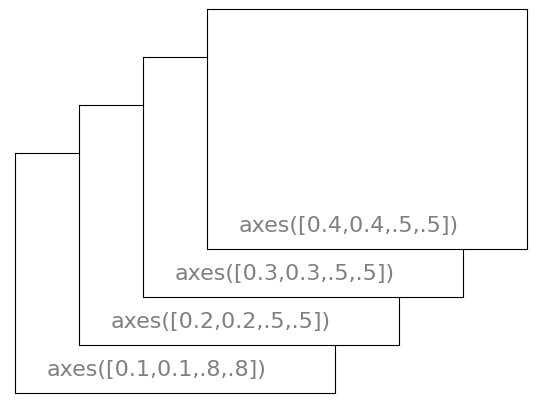

In [13]:
plt.axes([0.1,0.1,.5,.5])
plt.xticks([]), plt.yticks([])
plt.text(0.1,0.1, 'axes([0.1,0.1,.8,.8])',ha='left',va='center',size=16,alpha=.5)

plt.axes([0.2,0.2,.5,.5])
plt.xticks([]), plt.yticks([])
plt.text(0.1,0.1, 'axes([0.2,0.2,.5,.5])',ha='left',va='center',size=16,alpha=.5)

plt.axes([0.3,0.3,.5,.5])
plt.xticks([]), plt.yticks([])
plt.text(0.1,0.1, 'axes([0.3,0.3,.5,.5])',ha='left',va='center',size=16,alpha=.5)

plt.axes([0.4,0.4,.5,.5])
plt.xticks([]), plt.yticks([])
plt.text(0.1,0.1, 'axes([0.4,0.4,.5,.5])',ha='left',va='center',size=16,alpha=.5)

plt.show()